In [1]:
#import libraris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil as parser

In [2]:
dataset = pd.read_csv('data/appdata10.csv')

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#hour is not included because of a string
#data cleaning
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [6]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#create new dataframe with required columns
dataset_c = dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])
dataset_c.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


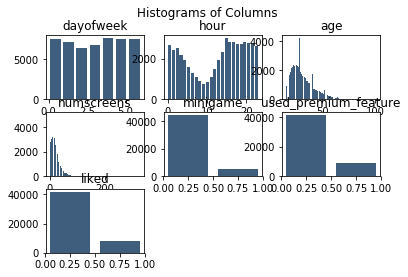

In [8]:
#histograms of the columns of dataset_c
plt.suptitle("Histograms of Columns")
for i in range(1,dataset_c.shape[1]+1):
    plt.subplot(3,3,i)
    feature = plt.gca()
    feature.set_title(dataset_c.columns.values[i-1])
    bins = np.size(dataset_c.iloc[:,i-1].unique())
    plt.hist(dataset_c.iloc[:,i-1],bins=bins,color='#3F5D7D',rwidth=0.8)

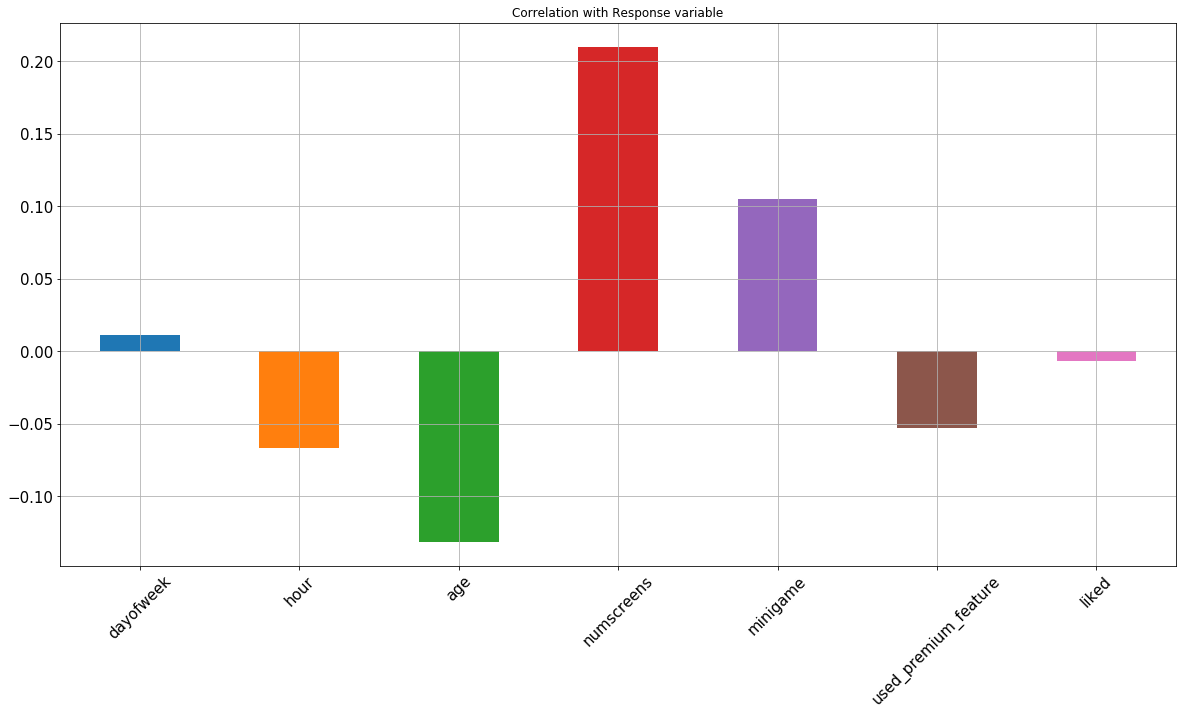

In [9]:
#plotting correlation wrg to Response
dataset_c.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),title="Correlation with Response variable",fontsize=15,rot=45,grid=True)

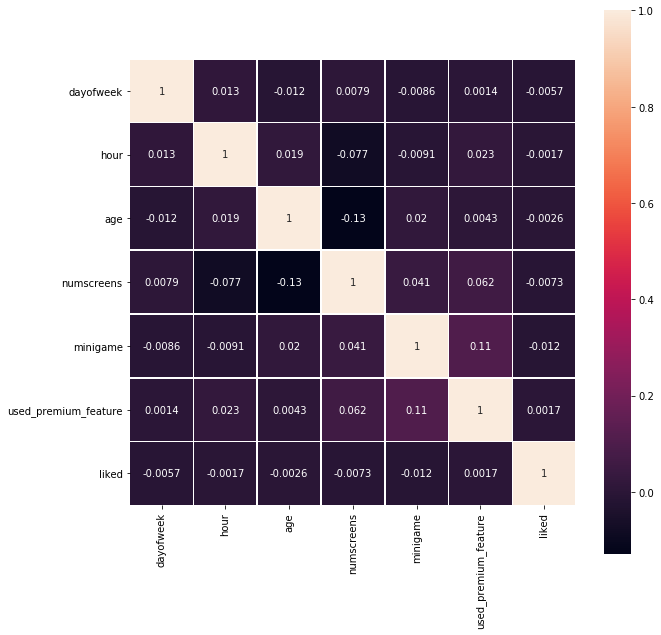

In [10]:
#correlation metrix
corr = dataset_c.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,linewidths=.5,square=True)

# Feature Engineering

We need to convert dates to actualt date objects

In [11]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
from dateutil import parser as ps
dataset['first_open'] = [ ps.parse(row_data) for row_data in dataset['first_open']]

In [13]:
dataset['enrolled_date'] = [ ps.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset['enrolled_date']]

In [14]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [15]:
dataset['difference'] = (dataset.enrolled_date-dataset.first_open).astype('timedelta64[h]')

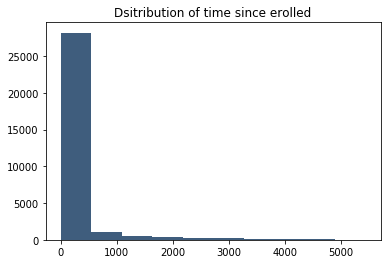

In [16]:
#plot best time to cutoff
plt.hist(dataset['difference'].dropna(),color='#3F5D7D')
plt.title('Dsitribution of time since erolled')
plt.show()

looks everything first 500 hours


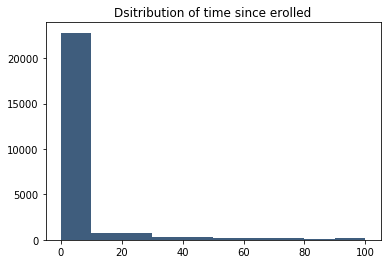

In [17]:
plt.hist(dataset['difference'].dropna(),color='#3F5D7D',range=[0,100])
plt.title('Dsitribution of time since erolled')
plt.show()

distribution major population within 100 hours

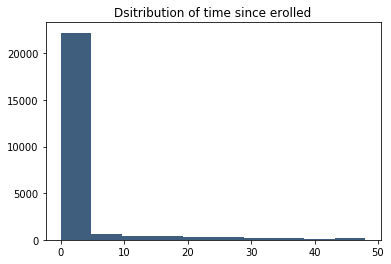

In [18]:
#check for 2 days (48 hours)
plt.hist(dataset['difference'].dropna(),color='#3F5D7D',range=[0,48])
plt.title('Dsitribution of time since erolled')
plt.show()

In [19]:
dataset.loc[dataset.difference > 48,'enrolled']=0

In [20]:
dataset = dataset.drop(columns=['difference','enrolled_date','first_open'])

In [21]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


# Feature engineering for screen list

In [22]:
#import the top screens dataset
top_screens = pd.read_csv('data/top_screens.csv').top_screens.values

In [23]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [24]:
#adding a comma and from it we can get comma+1 screens
dataset['screen_list'] = dataset.screen_list.astype(str)+","

In [25]:
dataset['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
5        idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...
6              product_review,product_review2,ScanPreview,
7        Splash,Cycle,Home,Credit3Container,Credit3Dash...
8        product_review,product_review2,ScanPreview,Ver...
9        Home,Loan2,product_review,product_review,produ...
10       Splash,idscreen,Home,RewardsContainer,Settings...
11       product_review,Home,Loan2,Credit3Container,Ver...
12       idscreen,joinscreen,Cycle,product_review,produ...
13               Alerts,ProfilePage,Home,Credit3Container,
14       joinscreen,product_review,product_review2,Scan...
15       idscreen,joinscreen,Cycle,Loan2,product_review...
16       product_review,product_review,product_review,p.

In [26]:

for sc in top_screens:
    #create column for each screen
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    #remove screen name from screenlist column and replace with empty string
    dataset['screen_list'] = dataset.screen_list.str.replace(sc+",","")
    
    

In [27]:
#find left over screens in the screenlist column by counting commas and collect it to others column
dataset['others'] = dataset.screen_list.str.count(",")

In [28]:
dataset.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,others
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,10


In [29]:
#drop screen_list
dataset = dataset.drop(columns=['screen_list'])

removing correlated fields by getting count of the category and drop individual correlated fieds <br>
eg = savings_screens,credit_screens,loan_screens,cc_screen

In [30]:
#get saving screens count
saving_screens = ["Saving1","Saving2","Saving2Amount","Saving4","Saving5","Saving6","Saving7","Saving8","Saving9","Saving10"]

#get the count of savings screen count by searching saving_screens names columns
dataset['SavingsCount'] = dataset[saving_screens].sum(axis=1)

#remove dummy variable separate columns since we got the count above
dataset = dataset.drop(columns=saving_screens)

In [31]:
#get creditcard_screens count
cc_screens = ["CC1","CC1Category","CC3"]

#get the count of creditcard_screens count by searching creditcard_screens names columns
dataset['CCCount'] = dataset[cc_screens].sum(axis=1)

#remove dummy variable separate columns since we got the count above
dataset = dataset.drop(columns=cc_screens)

In [32]:
#get loan_screens count
loan_screens = ["Loan","Loan2","Loan3","Loan4"]

#get the count of loan_screens count by searching loan_screens names columns
dataset['LoansCount'] = dataset[loan_screens].sum(axis=1)

#remove dummy variable separate columns since we got the count above
dataset = dataset.drop(columns=loan_screens)

In [33]:
#get credit_screens count
cm_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]

#get the count of credit_screens count by searching credit_screens names columns
dataset['CMCount'] = dataset[cm_screens].sum(axis=1)

#remove dummy variable separate columns since we got the count above
dataset = dataset.drop(columns=cm_screens)

In [34]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CCCount,LoansCount,CMCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,1,0
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,1,0
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,0,1,3
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,0,1,2


In [36]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,others,SavingsCount,CCCount,LoansCount,CMCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.176860,0.788400,0.92776
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,0.612787,0.677462,1.21751
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.00000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.00000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,1.00000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,3.000000,3.000000,5.00000


In [39]:
#save preprocessed data to new file
dataset.to_csv("data/new_appdata.csv",index=False)